# Build a model to predict median house price

## Goals
- Build a model using both numpy and scikit-learn using California housing dataset to predict the median house price of any destrict

## Tools  
In this project we will use: 
- Pandas: a pupular library for data analysis
- NumPy: a popular library for sceintific computing
- Matplotlib: a popular library for data visualization
- scikit-learn: a popular library for training machine learning models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's set up different display and visualization options

In [6]:
plt.style.context('seaborn-v0_8-darkgrid')

## Load, clean and visualize the data

In [8]:
housing = pd.read_csv('housing.csv')

In [9]:
# Explore the top five rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# let's see the values of "ocean_proximity" column
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# Explore statistical description of numerical columns
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


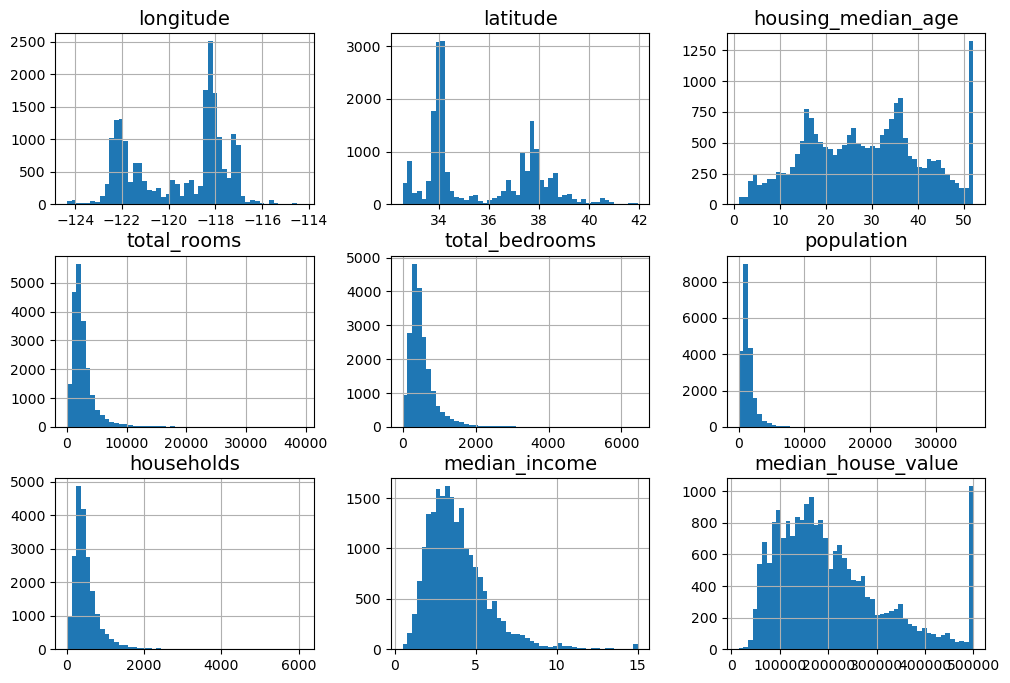

In [13]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=12, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins = 50, figsize = (12, 8))
plt.show()

- split the data in to test and train data

In [15]:
# Split the data to train dataset and test dataset
np.random.seed(42)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [17]:
len(train_set)

16512

In [18]:
len(test_set)

4128

In [19]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


We can also use scikit-learn to split the dataset

In [21]:
from sklearn.model_selection import train_test_split
train_set_2, test_set_2 = train_test_split(housing, test_size = 0.2, random_state = 42)

In [22]:
train_set_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


But this way of splitting would fail if we update the dataset (may be if we add another dataset). So the best way is using hashing.

In [24]:
import hashlib
def is_id_in_test(identifier, test_ratio):
    return hashlib.md5(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [25]:
def split_data_by_id(data, test_ratio, coln = "id_coln"):
    id_ = data[coln]
    test_id = id_.apply(lambda x: is_id_in_test(x, test_ratio))
    return data.loc[~test_id], data.loc[test_id]

In [26]:
def id_creator(data):
    data["new_id"] = data["longitude"] * 1000 + data["latitude"]
    return data

In [27]:
housing = id_creator(housing)

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,new_id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [29]:
train_set, test_set = split_data_by_id(housing, 0.2, coln = "new_id")

In [30]:
len(train_set)

16267

In [31]:
len(test_set)

4373

In [32]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,new_id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [33]:
train_set = train_set.drop("new_id", axis = 1)
test_set = test_set.drop("new_id", axis = 1)

In [34]:
train_set.to_csv("train_set.csv")
test_set.to_csv("test_set.csv")

In [35]:
# Dropping the "new_id" column
housing = housing.drop("new_id", axis = 1)

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Let's use stratified classifier. If we have convinced that the median income will affect more on the median value of the house in the district then we have to make sure the splitting process is by keeping this ratio

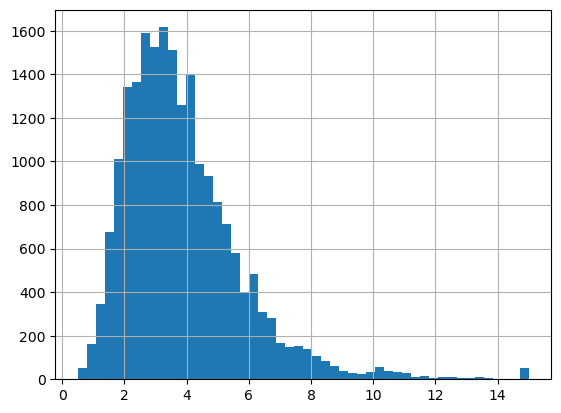

In [38]:
housing['median_income'].hist(bins = 50)
plt.show()

In [39]:
housing['median_income'].min()

0.4999

In [40]:
housing['median_income'].max()

15.0001

In [41]:
housing['median_income_cat'] = pd.cut(housing['median_income'], 
                                      bins = [0, 1.5, 3, 4.5, 6, np.inf], 
                                     labels = [1, 2, 3, 4, 5])

In [42]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


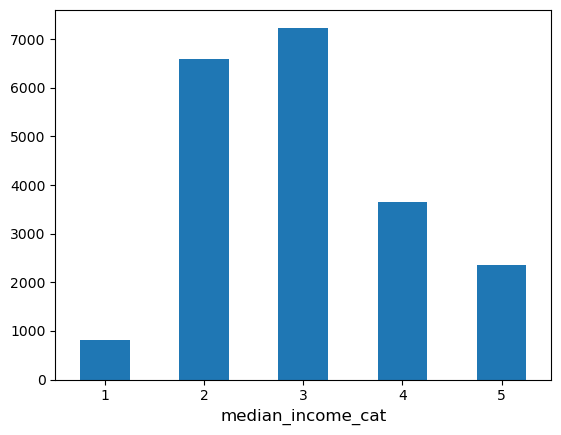

In [43]:
housing['median_income_cat'].value_counts().sort_index().plot.bar(rot = 0)
plt.show()

In [44]:
housing['median_income_cat'].value_counts()/len(housing)

median_income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Now let's use StrattifiedShuffleSplit

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in splitter.split(housing, housing['median_income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [47]:
strat_train_set['median_income_cat'].value_counts()/len(strat_train_set)

median_income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [48]:
strat_train_set = strat_train_set.drop("median_income_cat", axis = 1)
strat_test_set = strat_test_set.drop("median_income_cat", axis = 1)

In [49]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


In [50]:
strat_train_set.to_csv("strat_train_set.csv")
strat_test_set.to_csv("strat_test_set.csv")

## Exploratory Data Analysis (EDA)

In [52]:
# Let's make a copy of the strat_train_set
housing = strat_train_set.copy()

### Visualizing geographical data

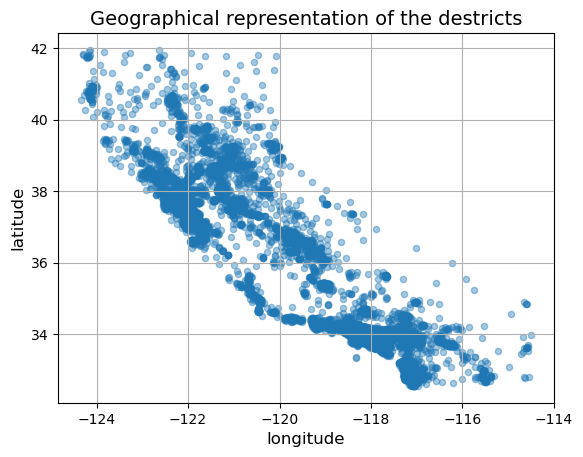

In [54]:
# Plot the catter plot of longitude vs latitude
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, grid = True)
plt.title('Geographical representation of the destricts')
plt.show()

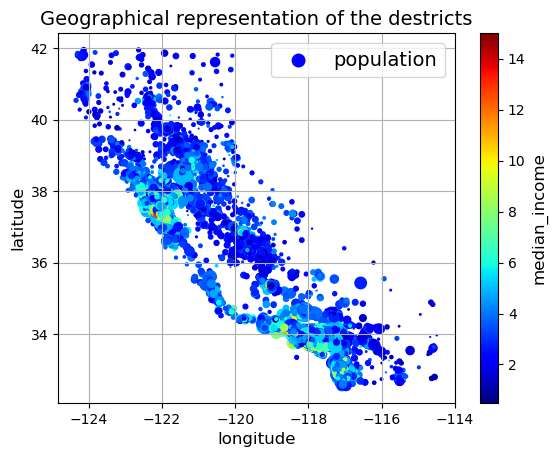

In [55]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True,
            s = housing['population']/100, c = 'median_income', cmap = 'jet',  
            label = 'population', legend = True)
plt.title('Geographical representation of the destricts')
plt.show()

### Histogram

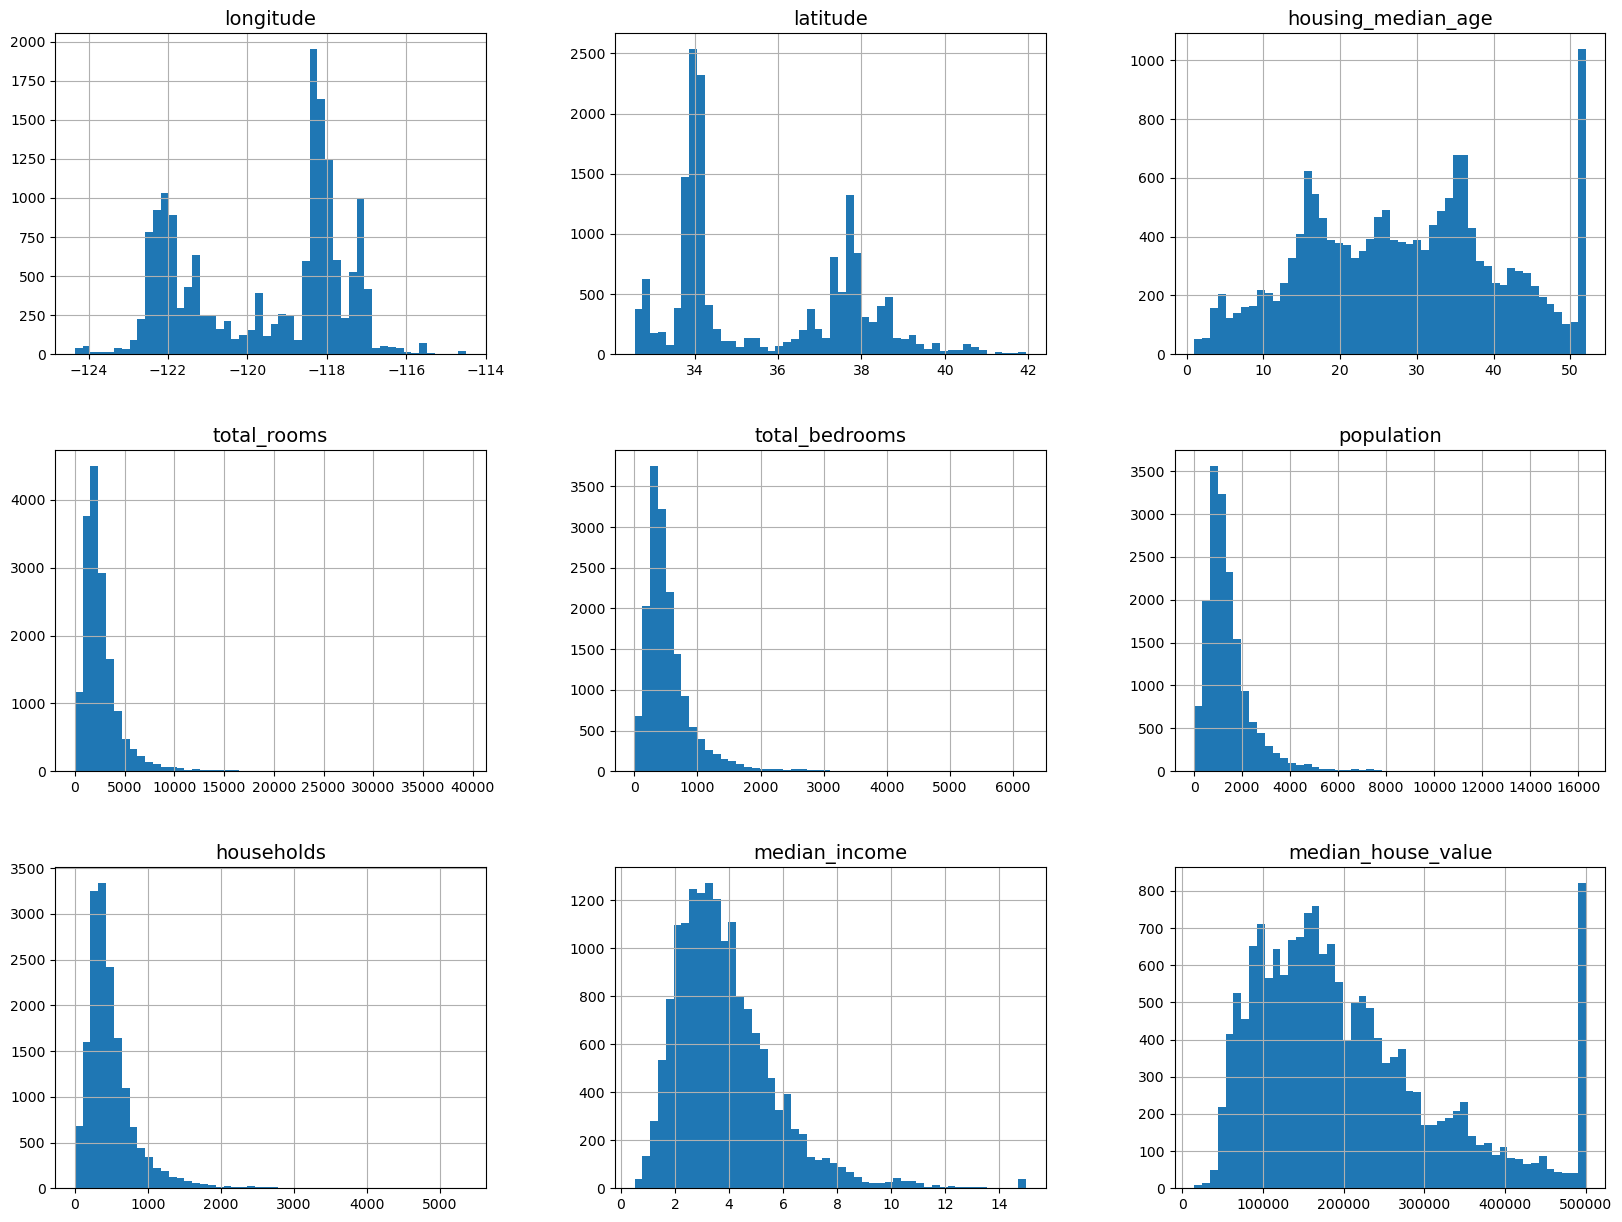

In [57]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

### Correlation

In [59]:
# Correlation matrix
housing.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [60]:
# Compute correlation of 'median house value' with the other attributes
housing.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Ok now let's explore visualization of our correlation in scatter plot

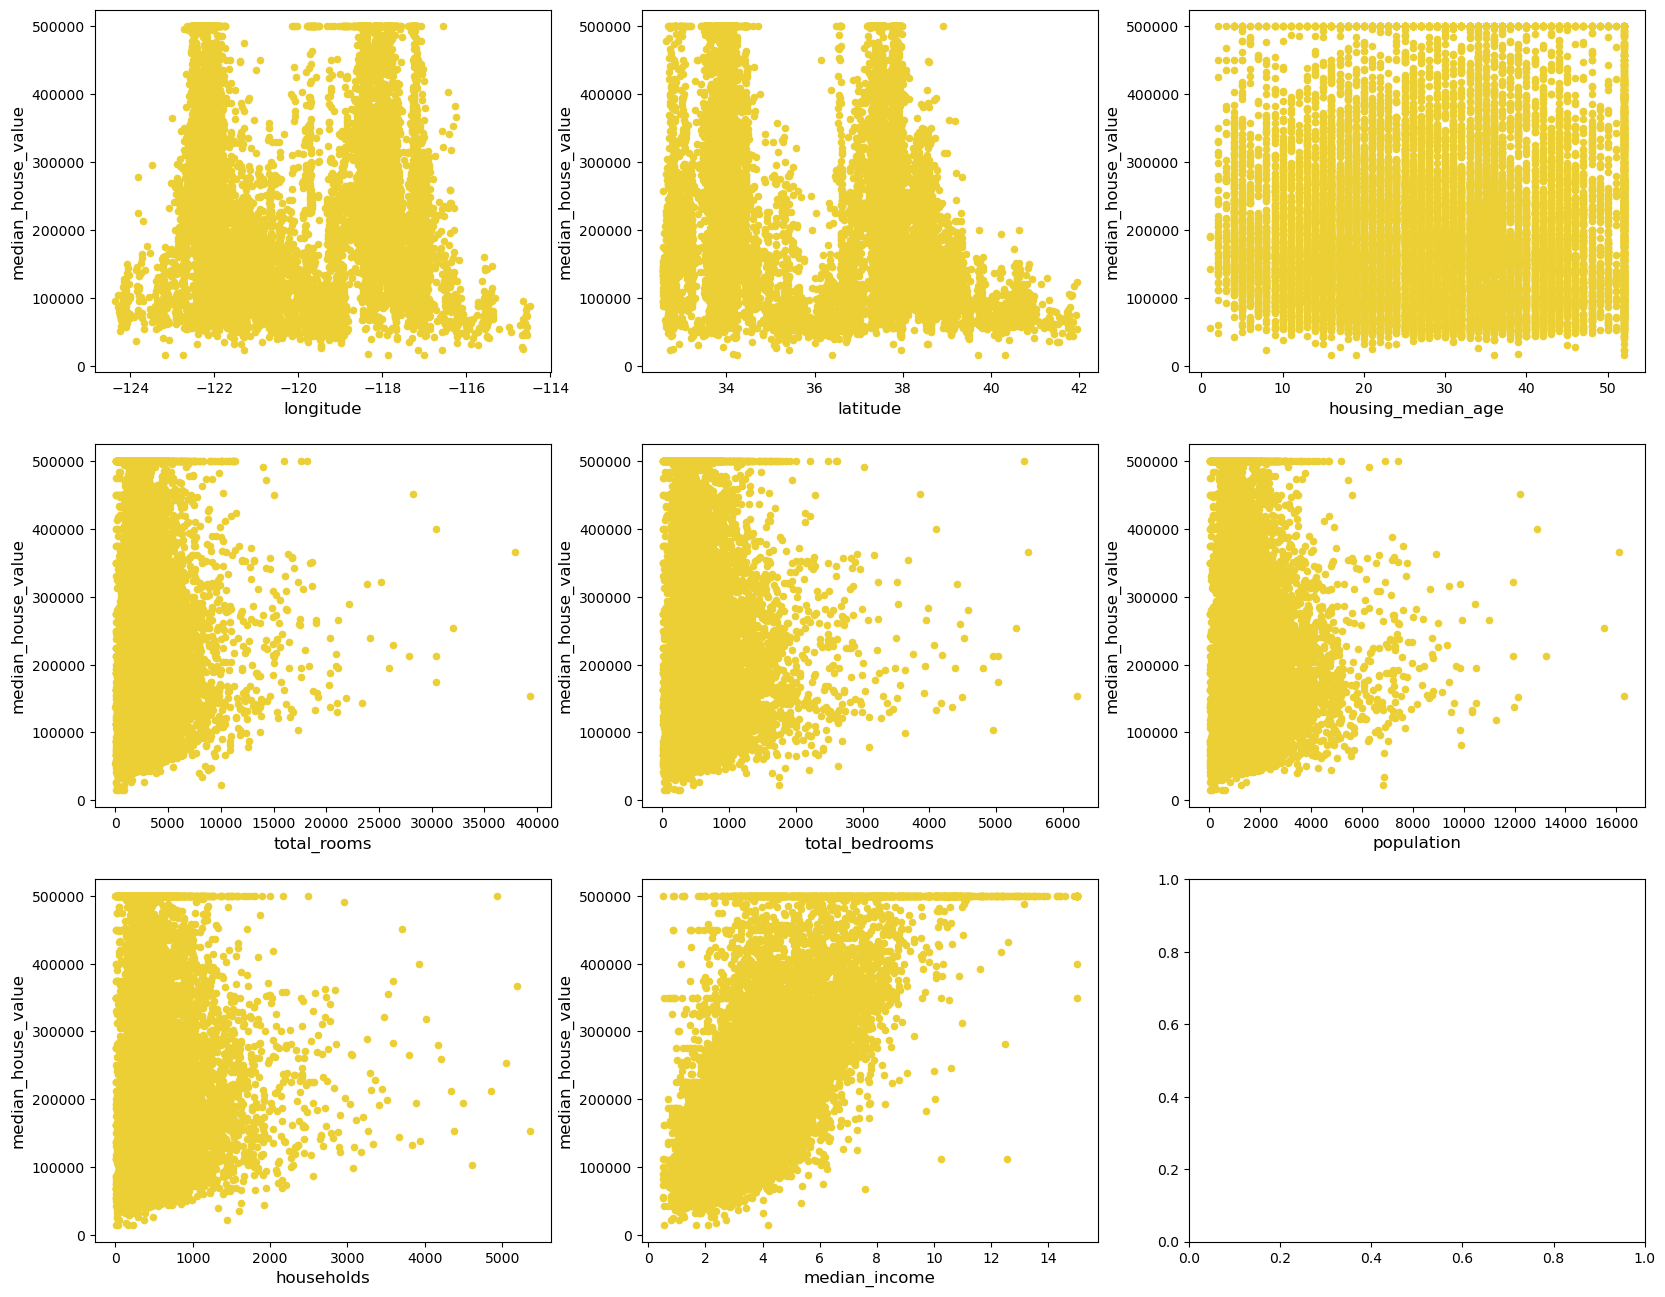

In [62]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']
terget_feature = 'median_house_value'

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 16))
for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    housing.plot(kind = 'scatter', x = feature, y = 'median_house_value', ax = axes[row, col], color = '#ebcf34')
plt.show()

So as we see from the scatter plot and from our correlation index 'median_income' and 'median_house_value' have a possitive correlation. let's zoom in and explore it

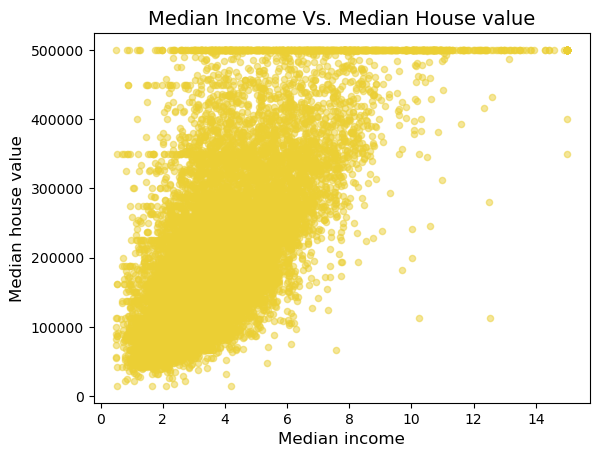

In [64]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value',
            color = '#ebcf34', alpha = 0.5)
plt.xlabel('Median income')
plt.ylabel("Median house value")
plt.title('Median Income Vs. Median House value')
plt.show()

### Try new attributes
total number of rooms and total number of bedrooms is not the best attribute for price valuation. So let's create new attributes

In [66]:
housing['room_per_house'] = housing['total_rooms'] / housing['households']
housing['people_per_house'] = housing['population'] / housing['households']
housing['bedrooms_per_house'] = housing['total_bedrooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']

In [67]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_house,people_per_house,bedrooms_per_house,bedrooms_ratio
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,3.211799,1.524178,1.078337,0.335742
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5.504202,1.865546,0.991597,0.180153
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,5.334975,2.768473,1.068966,0.200369
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,5.351282,2.365385,1.091026,0.203881
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3.725256,1.631399,1.033276,0.277371


In [68]:
housing.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
room_per_house        0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
bedrooms_per_house   -0.045545
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

Let's back to our splitted data and separate the input and output features

In [71]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [72]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [73]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

### Clean the data

In [75]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

As we can see from the above number of total_bedrooms contain missing values. So we have to find a way to clean the data
- Remove the entire row?
- get rid off the entire column?
- replace with fixed value?
- replace with statistical value of the feature(like mean, median, mode e.t.c)?

In [77]:
# Remove the entire row
housing.dropna(how = 'any').isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [78]:
# get rid off the entire column
housing.dropna(axis = 1).isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [79]:
# Replace with the median of the column/feature
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median()).isna().sum()

0

In [80]:
# Check our original data
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

Ok now let's use a class from scikit-learn to hendle the missing values and store the values for later use

In [82]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer
# drop non numeric columns/features
housing_num = housing.drop('ocean_proximity', axis = 1)

In [83]:
# Check if it contains only numerical columns
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [84]:
# Create anstance from SimpleImputer using median strategy
imputer = SimpleImputer(strategy = 'median')
# train/fit the data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [85]:
# See our computed medians
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [86]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [87]:
X = imputer.transform(housing_num)

In [88]:
# let's create the dataframe from the returned array
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                         index = housing_num.index)

In [89]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [90]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


### Handling Text and Categorical Attributes
In our case we have the "ocean_proximity" text feature specifically as we saw in the start it is categorical. So haw can we handle it?

In [92]:
housing_cat = housing[['ocean_proximity']]

In [93]:
housing_cat[:10]

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [94]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

Let's start with ordinal or label encoder

In [96]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_ordinal_encoded = ordinal_encoder.fit_transform(housing_cat)

In [97]:
housing_cat_ordinal_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [98]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Since our data is not ordinal data we will use OneHotEncoder

In [100]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output = False)
housing_cat_one_hot_encoded = one_hot_encoder.fit_transform(housing_cat)

In [101]:
housing_cat_one_hot_encoded[:4]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [102]:
# See the categories of the feature theat are encoded
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [103]:
one_hot_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [104]:
one_hot_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling and Transformation

Let's try MinMaxScalar first

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler(feature_range = (-1, 1))
housing_num_min_max_scaled = min_max_scalar.fit_transform(housing_num)

In [210]:
housing_min_max_scaled[:4]

array([[-0.60851927,  0.11702128,  1.        , -0.83117147, -0.64116605,
        -0.80701754, -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, -0.90014752, -0.88629409,
        -0.91866029, -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, -0.94501246, -0.93042358,
        -0.93141946, -0.92458466, -0.73336919],
       [ 0.46855984, -0.74468085, -0.37254902, -0.78778168, -0.7262039 ,
        -0.77401546, -0.70916558, -0.75698266]])

In [206]:
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
housing_num_standard_scaled = standard_scalar.fit_transform(housing_num)

In [212]:
housing_num_standard_scaled[:4]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.35909429,
         0.13746004,  1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43635598,
        -0.69377062, -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, -0.71224036, -0.75958421,
        -0.78876841, -0.77572662, -0.75978881],
       [ 1.23121557, -0.88492444, -0.91989094,  0.70226169,  0.73623112,
         0.38317548,  0.73137454, -0.85028088]])

As we have seen from visualization most of the data were skewed to the right. For example let's take the population

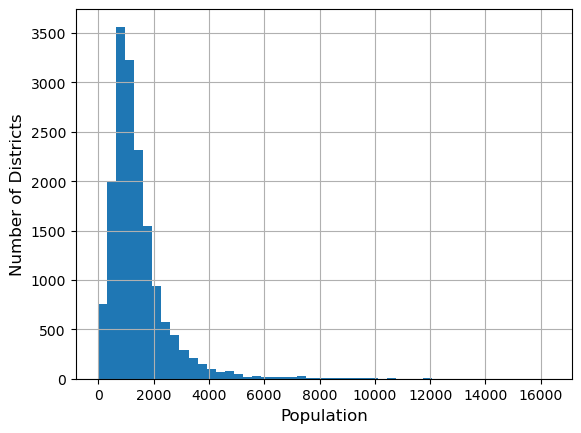

In [229]:
housing_num['population'].hist(bins = 50)
plt.xlabel('Population')
plt.ylabel('Number of Districts')
plt.show()

In [234]:
housing_num['population'].skew()

3.283510031326079

As we see from the histogram and skew measurness it skewed to the right and this will affect our model. So let's handle it

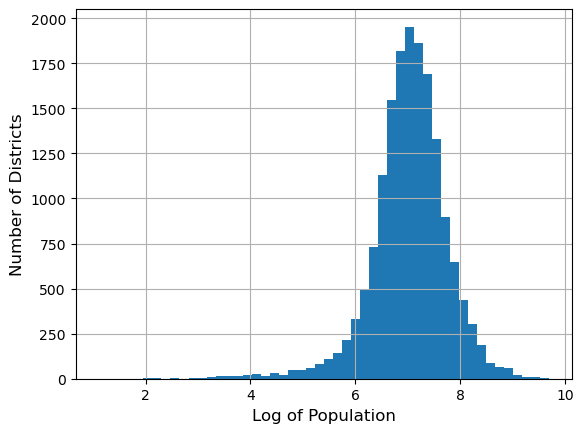

In [232]:
housing_num['population'].apply(np.log).hist(bins = 50)
plt.xlabel('Log of Population')
plt.ylabel('Number of Districts')
plt.show()

In [237]:
housing_num['population'].apply(np.log).skew()

-1.0749534272542118